# Chapter 1. Exploratory Data Analysis
## Exploring Data of ETF

In [1]:
%matplotlib inline

from pathlib import Path
from scipy.stats import trim_mean
from statsmodels import robust
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
import seaborn as sns
import matplotlib.pylab as plt

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [2]:
ETF_DATA_MSCI  = 'data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv'
etf_monthly = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD (Acc)_Monthly.csv')
fed_funds = pd.read_csv('data/Leitzins_USA_FED.csv')

# Estimates of ETF-Data
## Read and test the csv-file

In [3]:
etf = pd.read_csv(ETF_DATA_MSCI)
print(etf)

            Date       Open       High        Low      Close  Adj Close   
0     2009-09-25  17.209999  17.209999  17.209999  17.209999  17.209999  \
1     2009-09-28  17.209999  17.209999  17.209999  17.209999  17.209999   
2     2009-09-29  17.209999  17.209999  17.209999  17.209999  17.209999   
3     2009-09-30  17.209999  17.209999  17.209999  17.209999  17.209999   
4     2009-10-01  17.209999  17.209999  17.209999  17.209999  17.209999   
...          ...        ...        ...        ...        ...        ...   
3449  2023-04-26  71.900002  71.940002  71.122002  71.529999  71.529999   
3450  2023-04-27  71.416000  71.940002  71.321999  71.902000  71.902000   
3451  2023-04-28  72.318001  72.732002  72.110001  72.566002  72.566002   
3452  2023-05-02  73.010002  73.110001  71.835999  71.882004  71.882004   
3453  2023-05-03  72.199997  72.412003  71.867996  71.938004  71.938004   

      Volume  
0          0  
1          0  
2          0  
3          0  
4          0  
...      

# Lagermaße / measures datas of the ETF - Adj. Close Price

In [4]:
print("Mean Value of Adj Close: ", etf['Adj Close'].mean())

Mean Value of Adj Close:  41.30592765749855


In [5]:
print("Trim Value of Adj Close :", trim_mean(etf['Adj Close'], 0.1))

Trim Value of Adj Close : 40.02082893162084


In [6]:
print("Median Value of Adj Close: ", etf['Adj Close'].median())

Median Value of Adj Close:  39.09


In [7]:
print("Average Value of Adj Close: ", np.average(etf['Adj Close'], weights=etf['High']))

Average Value of Adj Close:  48.91482434089686


In [8]:
print(wquantiles.median(etf['Adj Close'], weights=etf['High']))

47.14792254417196


## Lagermaße / measures datas of the ETF Volume

In [9]:
print("Mean Value of Adj Close: ", etf['Adj Close'].mean())
print("Trim Value of Adj Close :", trim_mean(etf['Adj Close'], 0.1))
print("Median Value of Adj Close: ", etf['Adj Close'].median())
print("Average Value of Adj Close: ", np.average(etf['Adj Close'], weights=etf['High']))
print(wquantiles.median(etf['Adj Close'], weights=etf['High']))

Mean Value of Adj Close:  41.30592765749855
Trim Value of Adj Close : 40.02082893162084
Median Value of Adj Close:  39.09
Average Value of Adj Close:  48.91482434089686
47.14792254417196


# Extrema Calculation of the ETF Adj. Close and Volume

In [10]:
etf = pd.read_csv(ETF_DATA_MSCI)
print("Max. Value of Adj Close: ", etf['Adj Close'].max())
print("Min. Value of Adj Close: ", etf['Adj Close'].min())
print("Max. Value of ETF-Volume: ", etf['Volume'].max())
print("Min. Value of ETF-Volume: ", etf['Volume'].min())

Max. Value of Adj Close:  79.529999
Min. Value of Adj Close:  16.51
Max. Value of ETF-Volume:  2763326
Min. Value of ETF-Volume:  0



# Streuungsmaßen/Estimates of Variability
## Streuungsmaßen/Estimates of Variability for Adj. Close Price

Standard deviation / Standardabweichung

In [11]:
print('Standard deviation / Standardabweichung: ', etf['Adj Close'].std())

Standard deviation / Standardabweichung:  17.717813707041138


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [12]:
print('Interquartile range: ', etf['Adj Close'].quantile(0.75) - etf['Adj Close'].quantile(0.25))

Interquartile range:  28.015499749999996


Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [13]:
print('Robuster Median: ', robust.scale.mad(etf['Adj Close']))
print('Median absolute deviation:', abs(etf['Adj Close'] - etf['Adj Close'].median()).median() / 0.6744897501960817)

Robuster Median:  20.416915151040634
Median absolute deviation: 20.416915151040634


## Streuungsmaßen/Estimates of Variability for ETF - Volume

In [14]:
print('Standard deviation / Standardabweichung: ', etf['Adj Close'].std())
print('Interquartile range: ', etf['Adj Close'].quantile(0.75) - etf['Adj Close'].quantile(0.25))
print('Robuster Median: ', robust.scale.mad(etf['Adj Close']))
print('Median absolute deviation:', abs(etf['Adj Close'] - etf['Adj Close'].median()).median() / 0.6744897501960817)

Standard deviation / Standardabweichung:  17.717813707041138
Interquartile range:  28.015499749999996
Robuster Median:  20.416915151040634
Median absolute deviation: 20.416915151040634


# Percentiles and Boxplots
## Percentiles and Boxplots for Adj. Close Price

In [15]:
print(etf['Adj Close'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))


0.05    19.080000
0.25    24.530000
0.50    39.090000
0.75    52.545499
0.95    73.360201
Name: Adj Close, dtype: float64


In [16]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(etf['Adj Close'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

            5.0%  25.0%  50.0%      75.0%      95.0%
Adj Close  19.08  24.53  39.09  52.545499  73.360201


_Pandas_ provides a number of basic exploratory plots; one of them are boxplots

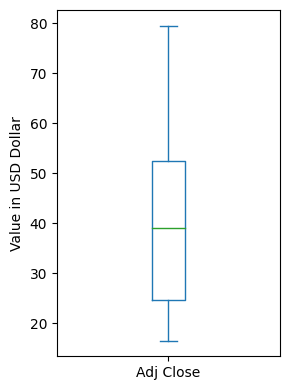

In [17]:
ax = (etf['Adj Close']).plot.box(figsize=(3, 4))
ax.set_ylabel('Value in USD Dollar')

plt.tight_layout()
plt.show()

## Percentiles and Boxplots for ETF - Volume

In [18]:
print(etf['Volume'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05         0.00
0.25      5397.50
0.50     84523.50
0.75    225347.00
0.95    613231.65
Name: Volume, dtype: float64


In [19]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(etf['Volume'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

        5.0%   25.0%    50.0%     75.0%      95.0%
Volume   0.0  5397.5  84523.5  225347.0  613231.65


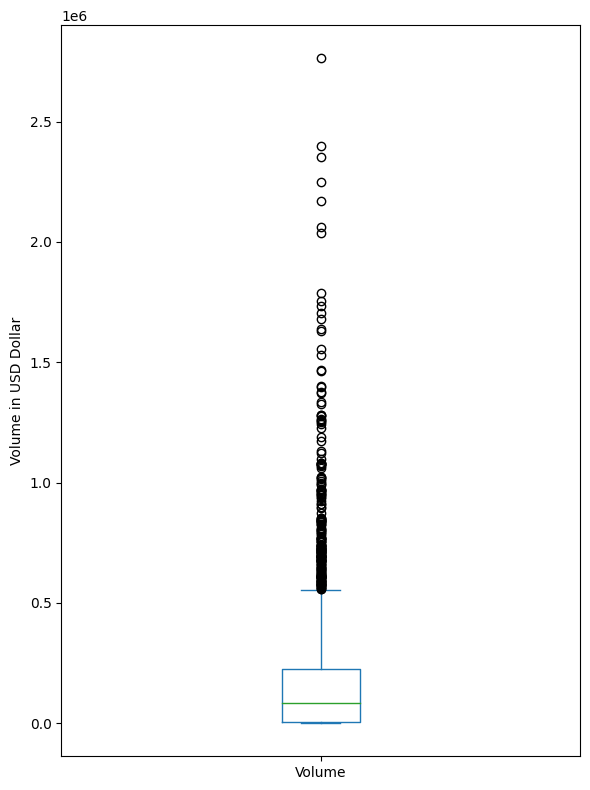

In [20]:
ax = (etf['Volume']).plot.box(figsize=(6, 8))
ax.set_ylabel('Volume in USD Dollar')

plt.tight_layout()
plt.show()

# ETF - Histogram
## Histogram shows the adjusted closing prices of the ETF in dependency of the Frequency

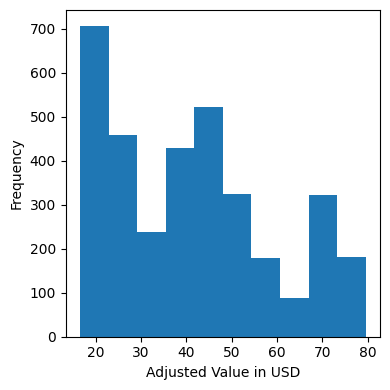

In [21]:
ax = (etf['Adj Close']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Adjusted Value in USD')

plt.tight_layout()
plt.show()

## Density Estimates

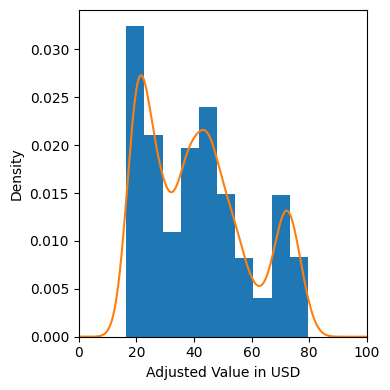

In [22]:
ax = etf['Adj Close'].plot.hist(density=True, xlim=[0, 100], figsize=(4, 4))
etf['Adj Close'].plot.density(ax=ax)
ax.set_xlabel('Adjusted Value in USD')

plt.tight_layout()
plt.show()

# Correlation

## Correlation between FED Monthly Funds and MSCI World Adj Close Monthly

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
etf_monthly = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD (Acc)_Monthly.csv')
fed_funds = pd.read_csv('data/Leitzins_USA_FED.csv')

     Adj Close  FEDFUNDS
0    16.750000      0.12
1    16.855000      0.12
2    18.010000      0.12
3    17.940001      0.11
4    18.370001      0.13
..         ...       ...
161  72.377998      4.65
162  72.566002      4.83
163  74.335999       NaN
164        NaN       NaN
165  74.723999       NaN

[166 rows x 2 columns]
0.4949510670140244


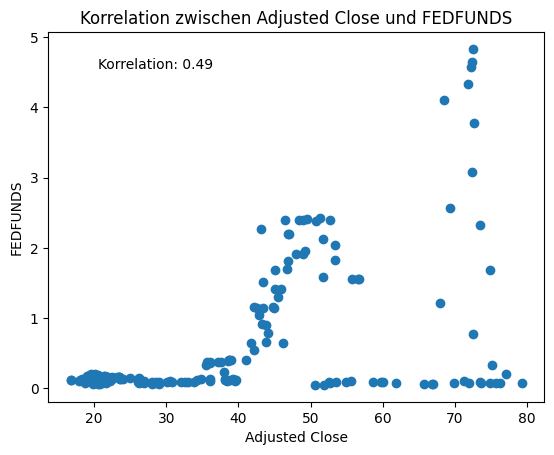

In [24]:
# Daten filtern und kombinieren
etf_filtered = etf_monthly.loc[(etf_monthly['Date'] >= '2009-10-01') & (etf_monthly['Date'] <= '2023-06-01'), ['Adj Close']]
fed_funds_filtered = fed_funds.loc[(fed_funds['DATE'] >= '2009-10-01') & (fed_funds['DATE'] <= '2023-06-01'), ['FEDFUNDS']]

# Daten zusammenführen
# reset_index()-Funktion setzt Index des Datenrahmens zurücksetzt
combined_data = pd.concat([etf_filtered.reset_index(drop=True), fed_funds_filtered.reset_index(drop=True)], axis=1)

print(combined_data)

# Korrelation berechnen
correlation = combined_data.corr().iloc[0, 1]
print(correlation)

# Scatterplot erstellen
plt.scatter(combined_data['Adj Close'], combined_data['FEDFUNDS'])
plt.xlabel('Adjusted Close')
plt.ylabel('FEDFUNDS')
plt.title('Korrelation zwischen Adjusted Close und FEDFUNDS')
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Plot anzeigen
plt.show()


Korrelation zwischen Adjusted Close und FEDFUNDS: 0.4949510670140244


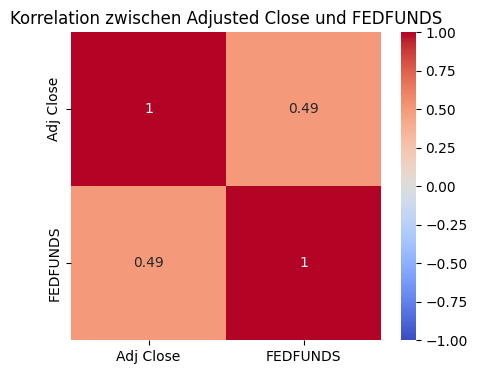

In [25]:
# Daten zusammenführen
# reset_index()-Funktion setzt Index des Datenrahmens zurücksetzt
combined_data = pd.concat([etf_filtered.reset_index(drop=True), fed_funds_filtered.reset_index(drop=True)], axis=1)

# Korrelationsmatrix erstellen
correlation_matrix = combined_data.corr()

# Korrelation ausgeben
correlation = correlation_matrix.iloc[0, 1]
print(f"Korrelation zwischen Adjusted Close und FEDFUNDS: {correlation}")

# Heatmap mit Korrelationsmatrix erstellen
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelation zwischen Adjusted Close und FEDFUNDS')
plt.show()


## Correlation between FED Monthly Funds and MSCI World Adj Close Monthly

In [26]:
eu_funds = pd.read_csv('data/leitzins Europa.csv')
print(eu_funds)

            Date  Percent per annum       obs. status  obs. comment
0     2023-04-22                3.5  Normal value (A)           NaN
1     2023-04-21                3.5  Normal value (A)           NaN
2     2023-04-20                3.5  Normal value (A)           NaN
3     2023-04-19                3.5  Normal value (A)           NaN
4     2023-04-18                3.5  Normal value (A)           NaN
...          ...                ...               ...           ...
5842  1999-01-05                3.0  Normal value (A)           NaN
5843  1999-01-04                3.0  Normal value (A)           NaN
5844  1999-01-03                3.0  Normal value (A)           NaN
5845  1999-01-02                3.0  Normal value (A)           NaN
5846  1999-01-01                3.0  Normal value (A)           NaN

[5847 rows x 4 columns]


-0.2658485872322365


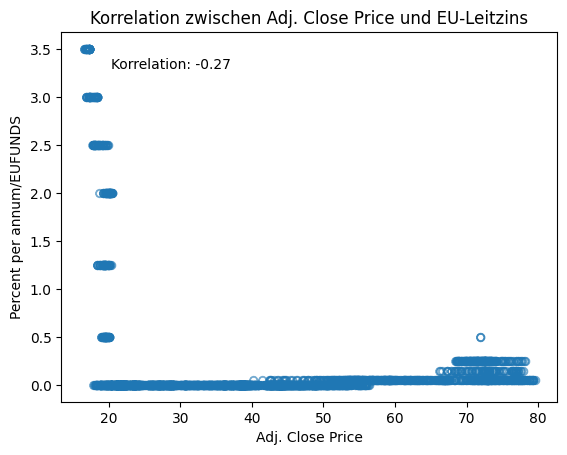

In [27]:
# Daten filtern und kombinieren
etf_filtered = etf.loc[(etf['Date'] >= '2009-10-01') & (etf['Date'] <= '2023-06-01'), ['Adj Close']]
eu_funds_filtered = eu_funds.loc[(eu_funds['Date'] >= '2009-10-01') & (eu_funds['Date'] <= '2023-06-01'), ['Percent per annum']]

# Daten zusammenführen
# reset_index()-Funktion setzt Index des Datenrahmens zurücksetzt
combined_data = pd.concat([etf_filtered.reset_index(drop=True), eu_funds_filtered.reset_index(drop=True)], axis=1)

# print(combined_data)

# Korrelation berechnen
# Fall wird der Wert in der Zeile mit Index 0 und der Spalte mit Index 1 abgerufen =>Korrelation zwischen den Spalten 0 und 1 des DataFrames
correlation = combined_data.corr().iloc[0, 1]
print(correlation)

# Scatterplot erstellen
plt.scatter(combined_data['Adj Close'], combined_data['Percent per annum'], marker='$\u25EF$', alpha=0.5)
plt.xlabel('Adj. Close Price')
plt.ylabel('Percent per annum/EUFUNDS')
plt.title('Korrelation zwischen Adj. Close Price und EU-Leitzins')
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Plot anzeigen
plt.show()


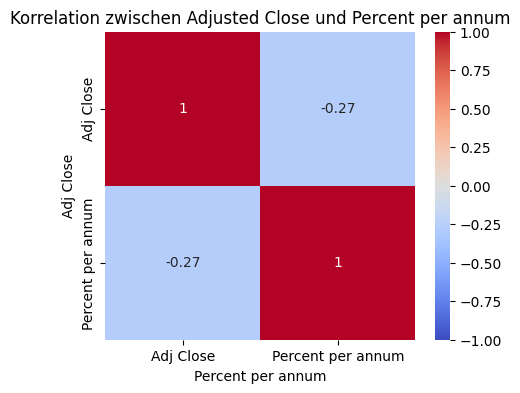

In [28]:
# Daten zusammenführen
combined_data = pd.concat([etf_filtered.reset_index(drop=True), eu_funds_filtered.reset_index(drop=True)], axis=1)

# Korrelationsmatrix erstellen
correlation_matrix = combined_data.corr()

# Heatmap mit Korrelationsmatrix erstellen
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelation zwischen Adjusted Close und Percent per annum')
plt.xlabel('Percent per annum')
plt.ylabel('Adj Close')
plt.show()


# Exploring Data for the Question: Why does the FED-Funds has a higher correlation value than the EU-Funds?

                  Standort  Gewichtung (%)
22      Vereinigte Staaten           68.73
12                   Japan            6.24
23  Vereinigtes Königreich            4.13
7               Frankreich            3.39
13                  Kanada            3.21
19                 Schweiz            2.86
3              Deutschland            2.39
1               Australien            2.03
15             Niederlande            1.30
18                Schweden            0.95
4                 Dänemark            0.88
21                 Spanien            0.69
8                 Hongkong            0.68
11                 Italien            0.67
9                   Irland            0.42
20                Singapur            0.37
2                  Belgien            0.26
6                 Finnland            0.25
16                Norwegen            0.19
10                  Israel            0.19
17                Portugal            0.06
24              Österreich            0.05
14         

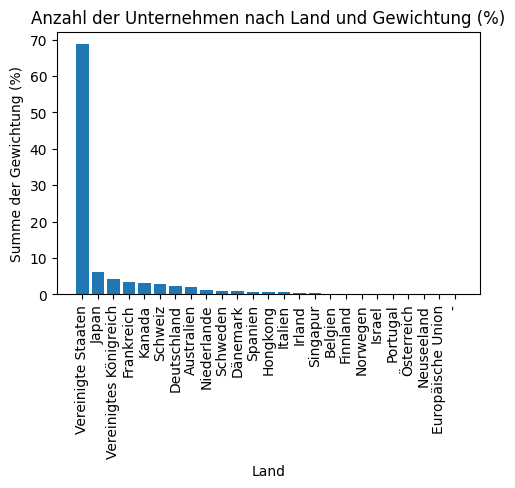

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
data = pd.read_csv('data/EUNL_holdings_MSCI_World.csv', skiprows=2)
# sumdata = sum(data['Gewichtung (%)'])
# print(sumdata)

# Umwandlung der Spalte "Gewichtung (%)" in den Datentyp float
data['Gewichtung (%)'] = data['Gewichtung (%)'].str.replace(',', '.').astype(float)

# Gruppieren nach Land und Summe der Kurse berechnen
grouped_data = data.groupby('Standort')['Gewichtung (%)'].sum().reset_index()

# Nach höchster Gewichtung sortieren
grouped_data = grouped_data.sort_values('Gewichtung (%)', ascending=False)

print(grouped_data)
#Diagramm erstellen
plt.figure(figsize=(5, 4))
plt.bar(grouped_data['Standort'], grouped_data['Gewichtung (%)'])
plt.xlabel('Land')
plt.ylabel('Summe der Gewichtung (%)')
plt.title('Anzahl der Unternehmen nach Land und Gewichtung (%)')
plt.xticks(rotation=90)
# Platz für Achsentexte schaffen
plt.tight_layout()

# Manuelle Anpassung des Layouts
plt.subplots_adjust(bottom=0.25)  # Nach Bedarf anpassen


# Diagramm anzeigen
plt.show()
